# CECS 229: EC Opportunity #1

### Submission Instructions:

Complete the task below. When you are finished, you must complete the following to receive a grade:

1. Submit this notebook to the Dropbox by **Friday 4/3 @ 11:59 PM**.  Rename this file so that your actual name replaces "YOUR NAME". For example, I would submit to the dropbox a file called `CECS 229 EC Opportunity #1 - KATHERINE VARELA.ipynb`.

2. Save your code ONLY to a .py file called `ec1.py`, and submit it on CodePost by the due date.

#### Problem 1:

##### Background Information:

A gray-scale image is defined by the intensities of its pixels, where the intensity values range from 0 (black) to 255 (white).  Suppose you have gray-scale image with ...
* width $w$ (i.e. $w$ pixels across) 
* height $h$ (i.e. $h$ pixels high).  

Then, the intensity of pixel $(i,j)$ is denoted as $I(i,j)$ so that $0 \leq I(i,j) \leq 255$ for any $ 0 \leq i \leq w-1$ and $0 \leq j \leq h-1$. 

Moreover, we define the pixel at $(0,0)$ to be the bottom-left pixel of any given image, while the pixel at $(w-1, h-1)$ is the top-right pixel.  Run the code below to see a diagram that exemplifies these definitions.

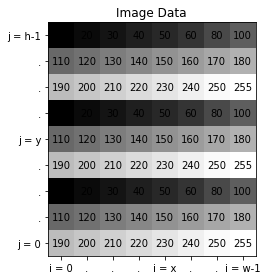

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Y = ["j = h-1", ".",".", ".", "j = y",
              ".", ".", ".", "j = 0"]
X = ["i = 0", ".", ".",
           ".", "i = x", ".",".", "i = w-1"]

pixels = np.array([[10, 20, 30, 40, 50, 60, 80, 100],
                    [110, 120, 130, 140, 150, 160, 170, 180],
                    [190, 200, 210, 220, 230, 240, 250, 255],
                    [10, 20, 30, 40, 50, 60, 80, 100],
                    [110, 120, 130, 140, 150, 160, 170, 180],
                    [190, 200, 210, 220, 230, 240, 250, 255],
                    [10, 20, 30, 40, 50, 60, 80, 100],
                    [110, 120, 130, 140, 150, 160, 170, 180],
                    [190, 200, 210, 220, 230, 240, 250, 255]])


fig, ax = plt.subplots()
im = ax.imshow(pixels,cmap = "gray")

ax.set_xticks(np.arange(len(X)))
ax.set_yticks(np.arange(len(Y)))
ax.set_xticklabels(X)
ax.set_yticklabels(Y)

plt.setp(ax.get_xticklabels(), ha="center", rotation_mode="anchor")

for i in range(len(Y)):
    for j in range(len(X)):
        ax.text(j, i, pixels[i, j], ha="center", va="center", color="black")

ax.set_title("Image Data")
fig.tight_layout()
plt.show()

In the diagram above $I(0,0) = 190$, $I(x, y) = 150$, and $I(w-1, h-1) = 100$, just to name a few sample intensities.

##### Your task:

Complete the function `image2complex(img_name)` which returns a set of complex numbers 
$$S = \{x+yi \;|\; I(x,y) < 120 \}$$ 

given an image `img_name`.  That is, it returns the set of complex numbers $x+yi$ such that the intensity of each pixel $(x,y)$ in the set is less than 120.

Test your function with the given image "img01.png".  Make sure that "img01.png", `image.py`, `plotting.py`, and `png.py` are in the same folder as this Jupyter notebook file.  You can compare your results with the expected outcome uploaded to BeachBoard.

In [9]:

def image2complex(img_name):
    import image
    
    NP = 0
    CP = 0
    
    data = image.color2gray(image.file2image("img01.png"))
    
    output = set()
    for i in reversed(data):
            
        for ii in i:
            NP = NP + 1
            if ii < 120:
                output.add(complex( NP,CP))
        NP = 0
        CP = CP + 1
        
    return output

In [10]:
from plotting import plot

S = image2complex("img01.png")
plot(S, 200)

#### Problem 2:

Create a function `reflectV(S, h)` that reflects the points in the input set $S$ about the vertical line $x = h$:

1. INPUT: 
    * `S` - set S
    * `h` - float.
2. OUT:
    * set consisting of points in S reflected about the line $x = h$.
    
HINTS:

* Use the `cmath` python library to separate the real and imaginary parts of a complex number.
* See "Fields & Vectors" Relevant Exercise #9

In [4]:
import image
import math
def reflectV(S, h):
    output = set()
    
    for i in S:
        d = abs(i.real - h)
        
        if i.real>h:
            n = i - 2 * d
            output.add(n)
            
        if i.real<h:
            n = i + 2 * d
            output.add(n)
            
    return output
    pass



ModuleNotFoundError: No module named 'image'

In [5]:
h = -20
scale = 200

R1 = reflectV(S, h) #points reflected about x = -20
x_line = {h + y*1j for y in range(-scale, scale)}  #line of reflection

all_pts = R1.union(S, x_line)
plot(all_pts, 200) #second parameter affects window size


NameError: name 'reflectV' is not defined

#### Problem 3:

Create a function `reflectH(S, k)` that reflects the points in the input set $S$ about the horizontal line $y = k$:

1. INPUT: 
    * `S` - set S
    * `k` - float.
2. OUT:
    * set consisting of points in S reflected about the line $y = k$.

In [6]:

def reflectH(S, k):

    output = set()
    
    for i in S:
        d = abs(i.imag - k)
        
        if i.imag>k:
            n = complex(i.real, i.imag - 2 * d)
            output.add(n)
            
        if i.imag<k:
            n = complex(i.real, i.imag + 2 * d)
            output.add(n)
            
    return output
    pass

In [7]:
k = -20
scale = 200

R2 = reflectH(S, k) #points reflected about x = -20
y_line = {x + k*1j for x in range(-scale, scale)}  #line of reflection

all_pts = R2.union(S, y_line)
plot(all_pts, 200) #second parameter affects window size

NameError: name 'S' is not defined